###  Aplicación Covid-19

---

In [6]:
df = pd.read_csv("../casos-covid.csv", sep=";")

In [8]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,5/7/20,5,7,2020,348,7,Afghanistan,AF,AFG,38041757.0,Asia
1,4/7/20,4,7,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
2,3/7/20,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
3,2/7/20,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
4,1/7/20,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia


In [13]:
df["countriesAndTerritories"].value_counts()

Norway                                        188
France                                        188
Italy                                         188
Singapore                                     188
Belgium                                       188
Australia                                     188
China                                         188
Denmark                                       188
Czechia                                       188
Germany                                       188
Japan                                         188
Canada                                        188
Sweden                                        188
United_States_of_America                      188
Brazil                                        188
Netherlands                                   188
Iran                                          188
Austria                                       188
Russia                                        188
Switzerland                                   188


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
pd.options.display.max_rows = 999

covid = pd.read_csv("Covid19Casos2.csv", sep=";", index_col =  "id_evento_caso" )

# Argentina Solo
covid = covid.loc[ covid["residencia_pais_nombre"] == "Argentina"]

# Solo casos Confirmados
covid = covid.loc[covid["Clasificacion"].str.contains("confirmado"), :]


# Eliminamos columnas inecesarias
covid.drop([ "residencia_pais_nombre", "edad_años_meses", "residencia_provincia_id", "carga_provincia_id", 
            "residencia_departamento_id"] , axis=1, inplace=True)

# Renombro Columnas
covid.rename(columns={"residencia_departamento_nombre":'Barrio', "residencia_provincia_nombre": "Provincia",
                      "carga_provincia_nombre":"Provincia_Atendido"  }, inplace= True)

covid.head()


,sexo,edad,Provincia,Barrio,Provincia_Atendido,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,Clasificacion,clasificacion_resumen,fecha_diagnostico,ultima_actualizacion
id_evento_caso,,,,,,,,,,,,,,,,,,,
734634,M,43.0,CABA,COMUNA 1,CABA,28/2/20,2/3/20,10,1/3/20,NO,NaN,NO,NaN,NO,Privado,Caso confirmado - No activo (por laboratorio y...,Confirmado,3/3/20,15/6/20
736018,M,58.0,Córdoba,San Justo,Córdoba,2/3/20,3/3/20,10,2/3/20,NO,NaN,NO,NaN,NO,Privado,Caso confirmado - No activo (por laboratorio y...,Confirmado,6/3/20,15/6/20
736711,F,67.0,Buenos Aires,Tres de Febrero,Buenos Aires,27/2/20,4/3/20,10,3/3/20,NO,NaN,NO,NaN,NO,Público,Caso confirmado - No activo (por laboratorio y...,Confirmado,6/3/20,15/6/20
737975,M,45.0,CABA,COMUNA 5,CABA,4/3/20,5/3/20,10,NaN,NO,NaN,NO,NaN,NO,Privado,Caso confirmado - No activo (por tiempo de evo...,Confirmado,6/3/20,15/6/20
738329,M,65.0,CABA,COMUNA 1,CABA,4/3/20,5/3/20,10,4/3/20,SI,4/3/20,SI,7/3/20,SI,Público,Caso confirmado - Fallecido,Confirmado,7/3/20,15/6/20


## Cuidado Intensivo 

NO    30928
SI      926
Name: cuidado_intensivo, dtype: int64

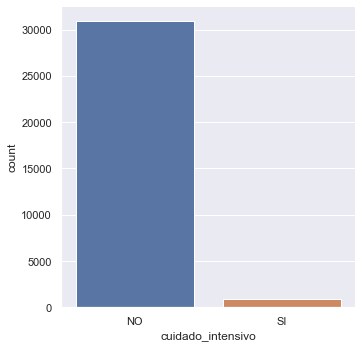

In [108]:
sns.catplot(kind="count", x="cuidado_intensivo", data=covid)

covid.cuidado_intensivo.value_counts()

In [109]:
internados = covid.cuidado_intensivo.value_counts()[0]
no_internados= covid.cuidado_intensivo.value_counts()[1]

no_internados /(internados + no_internados) # porcentaje de no internados

0.029070132479437433

## Análisis del Sexo
---

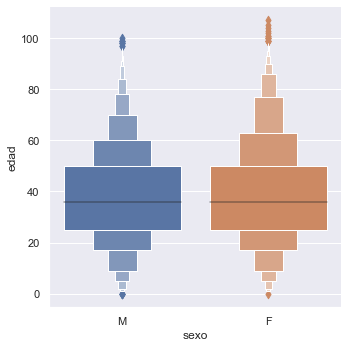

In [111]:
sns.catplot(kind="boxen", y="edad", x="sexo", data=covid.query("sexo!='NR'"))

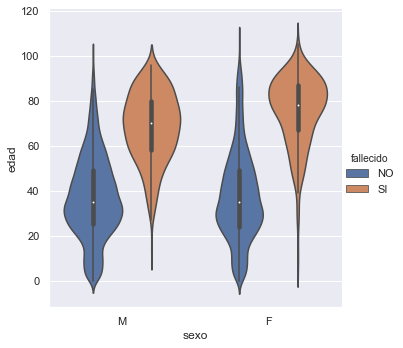

In [113]:
sns.catplot(kind="violin", y="edad", x="sexo",hue="fallecido", data=covid.query("sexo!='NR'"))

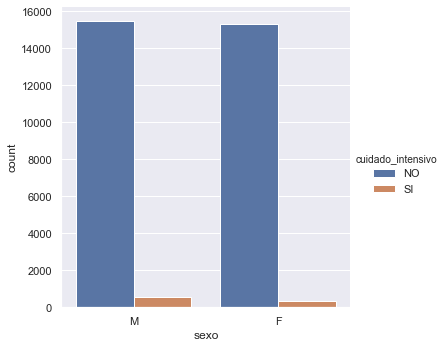

In [112]:
sns.catplot(kind="count", x="sexo", hue="cuidado_intensivo", data=covid.query("sexo!='NR'"))

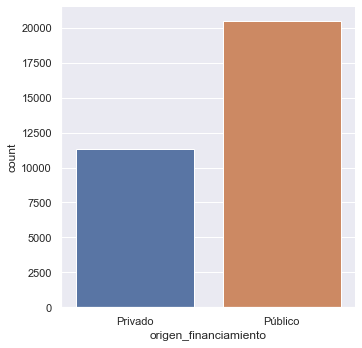

In [114]:
sns.catplot(kind="count", x="origen_financiamiento", data=covid)

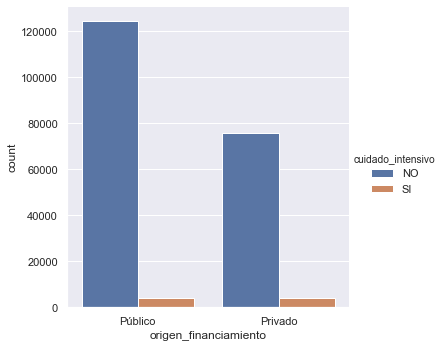

In [170]:
sns.catplot(kind="count", x="origen_financiamiento",hue="cuidado_intensivo" , data=covid)

## Análisis Geógrafico
---

### Provincias

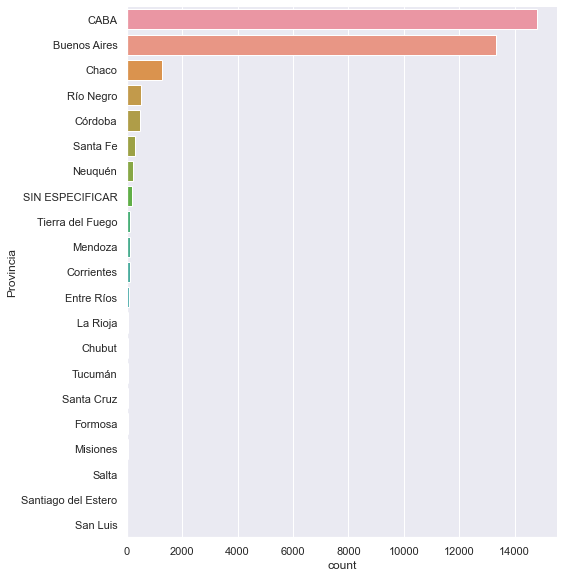

In [115]:
# Seleccion de barrios con mas casos
Barrios_mas_casos = covid.groupby(by="Provincia").count()["sexo"].sort_values(ascending=False)[0:21]

#Subselección
data = covid.loc[covid["Provincia"].apply(lambda x: x in  Barrios_mas_casos.index.values ), :  ]

sns.catplot(kind="count", y = "Provincia" ,data=data, height=8, order= Barrios_mas_casos.index)

### Barrios en CABA
---

Text(0.5, 1.0, 'Cantidad de Casos Capital')

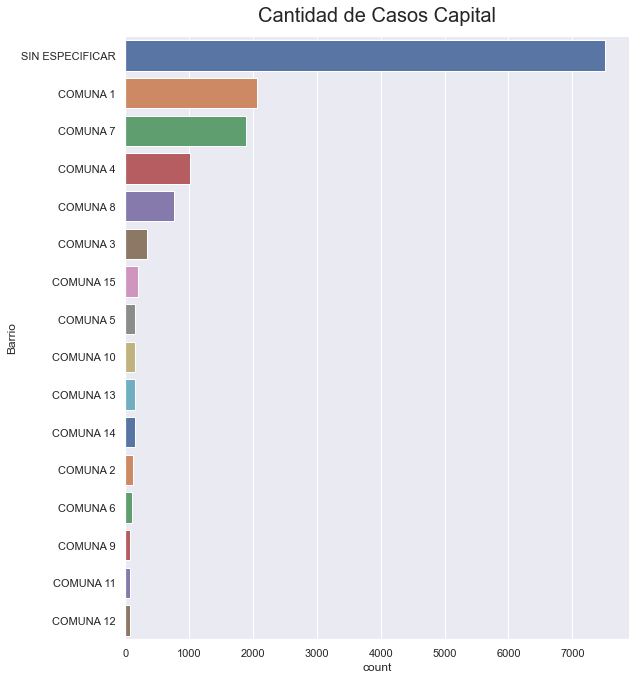

In [116]:
# Analizando CABA
CABA = covid.query("Provincia=='CABA'")
o = CABA.groupby("Barrio").count()["sexo"].sort_values().index[::-1]


sns.catplot(kind="count", y="Barrio" , data=CABA , order = o , height=9,  palette="deep")
plt.title("Cantidad de Casos Capital", fontdict={'fontsize':20}, pad=15)

### Barrios En Provincia
----

Text(0.5, 1.0, 'Cantidad de casos Provincia')

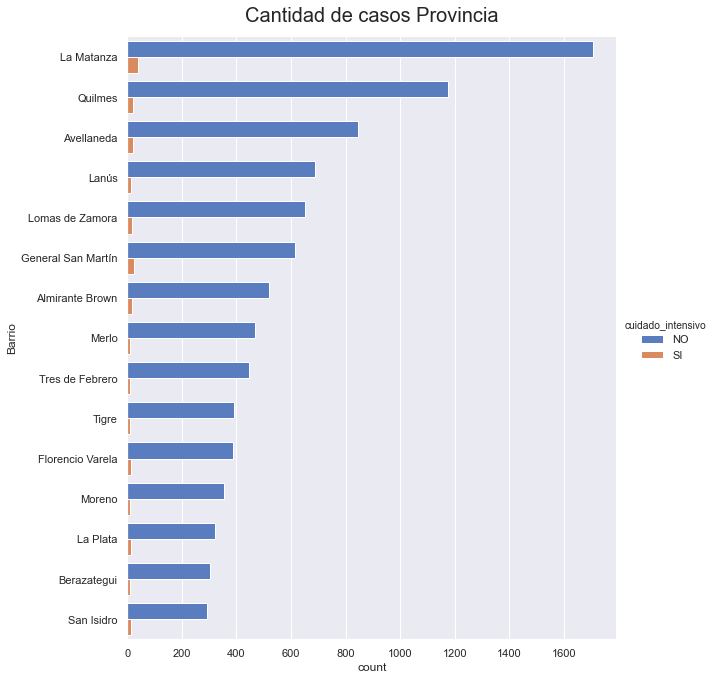

In [117]:
Prov = covid.query("Provincia=='Buenos Aires'")
o = Prov.groupby("Barrio").count()["sexo"].sort_values(ascending=False).index[0:15].values



sns.catplot(kind="count", y="Barrio", hue="cuidado_intensivo" , data= Prov, order=o , height=9, palette="muted")
plt.title("Cantidad de casos Provincia", fontdict={'fontsize':20}, pad=15)